# UAS CV

In [7]:
!git clone https://gitlab.com/ykristian/fg-net-dataset

Cloning into 'fg-net-dataset'...
Updating files:  34% (699/2004)
Updating files:  35% (702/2004)
Updating files:  36% (722/2004)
Updating files:  37% (742/2004)
Updating files:  38% (762/2004)
Updating files:  39% (782/2004)
Updating files:  40% (802/2004)
Updating files:  41% (822/2004)
Updating files:  42% (842/2004)
Updating files:  43% (862/2004)
Updating files:  44% (882/2004)
Updating files:  45% (902/2004)
Updating files:  46% (922/2004)
Updating files:  47% (942/2004)
Updating files:  48% (962/2004)
Updating files:  49% (982/2004)
Updating files:  50% (1002/2004)
Updating files:  51% (1023/2004)
Updating files:  52% (1043/2004)
Updating files:  53% (1063/2004)
Updating files:  54% (1083/2004)
Updating files:  55% (1103/2004)
Updating files:  56% (1123/2004)
Updating files:  57% (1143/2004)
Updating files:  58% (1163/2004)
Updating files:  59% (1183/2004)
Updating files:  60% (1203/2004)
Updating files:  61% (1223/2004)
Updating files:  62% (1243/2004)
Updating files:  63% (1263

In [68]:
url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
import requests

r = requests.get(url, stream=True)
with open('haarcascade.xml', 'w') as f:
    f.write(r.text)

c:\


PermissionError: [Errno 13] Permission denied: 'haarcascade.xml'

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import dlib

import keras
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

In [92]:
# change this current directory to your directory
os.chdir('C:\\Users\\james\\Desktop\\J\\Kuliah\\Semester 6\\CV\\Latihan UAS')
os.getcwd() 
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is CA14-7644

 Directory of C:\Users\james\Desktop\J\Kuliah\Semester 6\CV\Latihan UAS

05/10/2021  02:02 PM    <DIR>          .
05/10/2021  02:02 PM    <DIR>          ..
05/10/2021  02:55 AM    <DIR>          .vscode
05/10/2021  02:02 PM           135,836 app.ipynb
05/10/2021  02:02 PM    <DIR>          fg-net-dataset
05/10/2021  02:02 PM           963,441 haarcascade.xml
               2 File(s)      1,099,277 bytes
               4 Dir(s)  200,327,168,000 bytes free


In [5]:
from keras_vggface.vggface import VGGFace
from keras.engine import  Model
from keras.layers import Input
from keras_vggface.vggface import VGGFace

# Convolution Features
vgg_features = VGGFace(include_top=False, input_shape=(200, 200, 3), pooling='avg') # pooling: None, avg or max
for m in vgg_features.layers:
  m.trainable = False
# After this point you can use your model to predict.
# ...
vgg_features.summary()

Model: "vggface_vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 200, 200, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 200, 200, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 100, 100, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 100, 100, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 100, 100, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 50, 50, 128)     

In [66]:
model = Sequential()
model.add(vgg_features)
model.add(Dense(20, activation='relu'))
model.add(Dense(1)) # 1 target class --> treat as regression
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vggface_vgg16 (Functional)   (None, 512)               14714688  
_________________________________________________________________
dense_4 (Dense)              (None, 20)                10260     
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 168       
Total params: 14,725,116
Trainable params: 10,428
Non-trainable params: 14,714,688
_________________________________________________________________


In [27]:
def read_pts(filename):
    return np.loadtxt(filename, comments=("version:", "n_points:", "{", "}"))

In [14]:
%cd fg-net-dataset/
%ls

c:\Users\james\Desktop\J\Kuliah\Semester 6\CV\Latihan UAS\fg-net-dataset
 Volume in drive C is Windows-SSD
 Volume Serial Number is CA14-7644

 Directory of c:\Users\james\Desktop\J\Kuliah\Semester 6\CV\Latihan UAS\fg-net-dataset

05/10/2021  12:08 PM    <DIR>          .
05/10/2021  12:08 PM    <DIR>          ..
05/10/2021  12:08 PM    <DIR>          images
05/10/2021  12:08 PM    <DIR>          points
               0 File(s)              0 bytes
               4 Dir(s)  204,885,327,872 bytes free


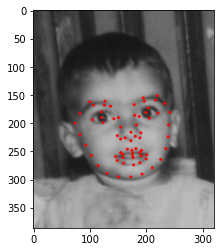

In [42]:
img = cv2.imread('images/001A02.JPG')
points = read_pts('points/001a02.pts')
for x, y in points:
    cv2.circle(img, (int(x),int(y)), 1, (255,0,0), 2)
plt.imshow(img, cmap='gray')

## Target Class 
* 0-2
* 4-6
* 8-13
* 15-20
* 25-32
* 38-43
* 48-53
* 60+"

In [79]:
imageFileNames = os.listdir('images')
ages = [int(imageFileName.split('.')[0][4:6]) for imageFileName in imageFileNames] 

y_train = [] 
for i in ages: 
    if 0 <= ages and ages <= 2:
        y_train.append("0-2")
    elif 4 <= ages and ages <= 6:
        y_train.append("4-6")
    elif 8 <= ages and ages <= 13:
        y_train.append("8-13")
    elif 15 <= ages and ages <= 20:
        y_train.append("15-20")
    elif 25 <= ages and ages <= 32:
        y_train.append("25-32")
    elif 38 <= ages and ages <= 43:
        y_train.append("38-43")
    elif 48 <= ages and ages <= 53:
        y_train.append("48-53")
    elif 60 <= ages:
        y_train.append("60+")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'images'

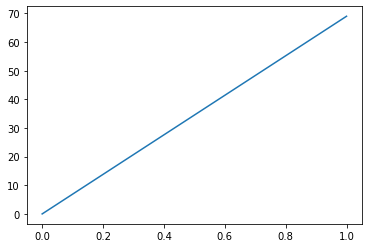

In [77]:
plt.plot((np.min(ages), np.max(ages)))

 Volume in drive C is Windows-SSD
 Volume Serial Number is CA14-7644

 Directory of c:\

01/03/2021  11:54 PM    <DIR>          admin
01/03/2021  11:56 PM    <DIR>          cfgtoollogs
01/04/2021  12:05 AM    <DIR>          checkpoints
01/03/2021  11:54 PM    <DIR>          diag
03/15/2021  05:47 PM    <DIR>          Drivers
01/03/2021  11:54 PM    <DIR>          flash_recovery_area
01/02/2021  12:39 PM    <DIR>          inetpub
04/30/2021  04:50 PM    <DIR>          Materi
01/03/2021  11:54 PM    <DIR>          oradata
01/03/2021  11:52 PM    <DIR>          product
05/09/2021  09:50 PM    <DIR>          Program Files
04/26/2021  11:42 AM    <DIR>          Program Files (x86)
01/02/2021  10:20 AM    <DIR>          Riot Games
03/16/2021  09:12 AM    <DIR>          Symbols
05/10/2021  03:46 PM    <DIR>          TEMP
01/02/2021  10:13 AM    <DIR>          Users
04/17/2021  06:48 PM    <DIR>          WCH.CN
04/18/2021  02:57 PM    <DIR>          WinBoard-4.8.0
05/05/2021  03:16 PM    <DIR>

 Volume in drive C is Windows-SSD
 Volume Serial Number is CA14-7644

 Directory of C:\Users\james\Desktop\J\Kuliah\Semester 6\CV\Latihan UAS

05/10/2021  02:02 PM    <DIR>          .
05/10/2021  02:02 PM    <DIR>          ..
05/10/2021  02:55 AM    <DIR>          .vscode
05/10/2021  02:02 PM           135,836 app.ipynb
05/10/2021  02:02 PM    <DIR>          fg-net-dataset
05/10/2021  02:02 PM           963,441 haarcascade.xml
               2 File(s)      1,099,277 bytes
               4 Dir(s)  200,327,344,128 bytes free
